In [1]:
# DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
# DBSCAN is a clustering algorithm that groups together points that are close to each other and 
# marks points that don’t belong to any group as outliers (noise).

# How Does DBSCAN Work?
# DBSCAN relies on two main ideas:
# Density → A region is considered dense if it has many points nearby.

# Connectivity → A cluster is formed by connecting points in high-density regions.

# DBSCAN uses two parameters:

# ε (Epsilon) → The radius to search for neighboring points.
# MinPts (Minimum Points) → The minimum number of points required to form a dense cluster.


# Steps of DBSCAN Algorithm
# Pick a random point from the dataset.
# Check how many points are within ε distance (neighbors).
# If the number of neighbors ≥ MinPts, this point is a core point (it starts a cluster).
# If the number of neighbors < MinPts, this point is marked as noise (it might later become part of 
# another cluster).
# Expand the cluster by adding all density-reachable points (points within ε distance of a core point).
# Repeat for all points in the dataset.
# Done! Points that do not belong to any cluster remain as noise.


# Advantages of DBSCAN
# Can find clusters of any shape (unlike K-Means, which assumes circular clusters).
# Automatically detects the number of clusters (no need to specify 
# 𝑘
# k like in K-Means).
# Can handle noise and outliers well.


# Disadvantages of DBSCAN
# Choosing the right ε value can be tricky.
# Does not work well for clusters of varying densities (if some clusters are very dense and others 
# are sparse).
# Struggles with high-dimensional data (because density is harder to define in high dimensions).

# Example: 
    
# Group customers who shop together frequently (clusters).
# Identify customers who rarely visit the mall (outliers).


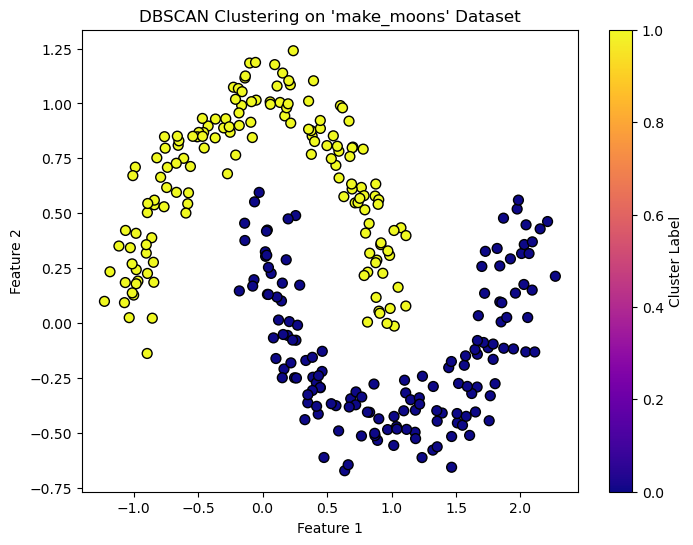

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# Step 1: Generate Dataset (Two Interleaving Moons)
X, y = make_moons(n_samples=300, noise=0.1, random_state=42)  # Create dataset

# Step 2: Apply DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)  # Define parameters
labels = dbscan.fit_predict(X)  # Get cluster labels

# Step 3: Plot Results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='plasma', edgecolors='k', s=50)
plt.title("DBSCAN Clustering on 'make_moons' Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Cluster Label")
plt.show()


# Example - 2 

In [3]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

data = pd.read_csv("C:\\Users\\asd\\Downloads\\general.csv")
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
# let’s have a look at the null values in the dataset:

In [5]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

# So we have some null values in the Maximum Payments column. I will fill these values with the average values and here I will also remove the customer id column as it is useless:

In [6]:
data = data.drop('CUST_ID', axis=1)
data.fillna(data.mean(), inplace=True)

In [7]:
# Now let’s scale and normalize the dataset:

In [8]:
# scaling and normalizing the dataset
scaler = StandardScaler()
x_scaled = scaler.fit_transform(data)
from sklearn.preprocessing import normalize
x_normal = normalize(x_scaled)
x_normal = pd.DataFrame(x_normal)

# Now I will implement the Principal Component Analysis (PCA) algorithm in machine learning to reduce the dimensionality of the data for visualization:

In [9]:
# reduce the dimensionality of the dataset
pca = PCA(n_components=2)
x_principal = pca.fit_transform(x_normal)
x_principal = pd.DataFrame(x_principal)
x_principal.columns = ['V1', 'V2']
print(x_principal.head())

         V1        V2
0 -0.489826 -0.679677
1 -0.518791  0.545015
2  0.330885  0.268979
3 -0.482374 -0.092113
4 -0.563289 -0.481914


# Now let’s implement the DBSCAN algorithm and have a look at the data and the clusters after implementing it:

In [10]:
dbscan = DBSCAN(eps=0.036, min_samples=4).fit(x_principal)
labels = dbscan.labels_
data['cluster'] = dbscan.labels_
print(data.tail())

         BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
8945   28.493517           1.000000     291.12              0.00   
8946   19.183215           1.000000     300.00              0.00   
8947   23.398673           0.833333     144.40              0.00   
8948   13.457564           0.833333       0.00              0.00   
8949  372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
8945                    0.000000                          0.833333   
8946                    0.000000                

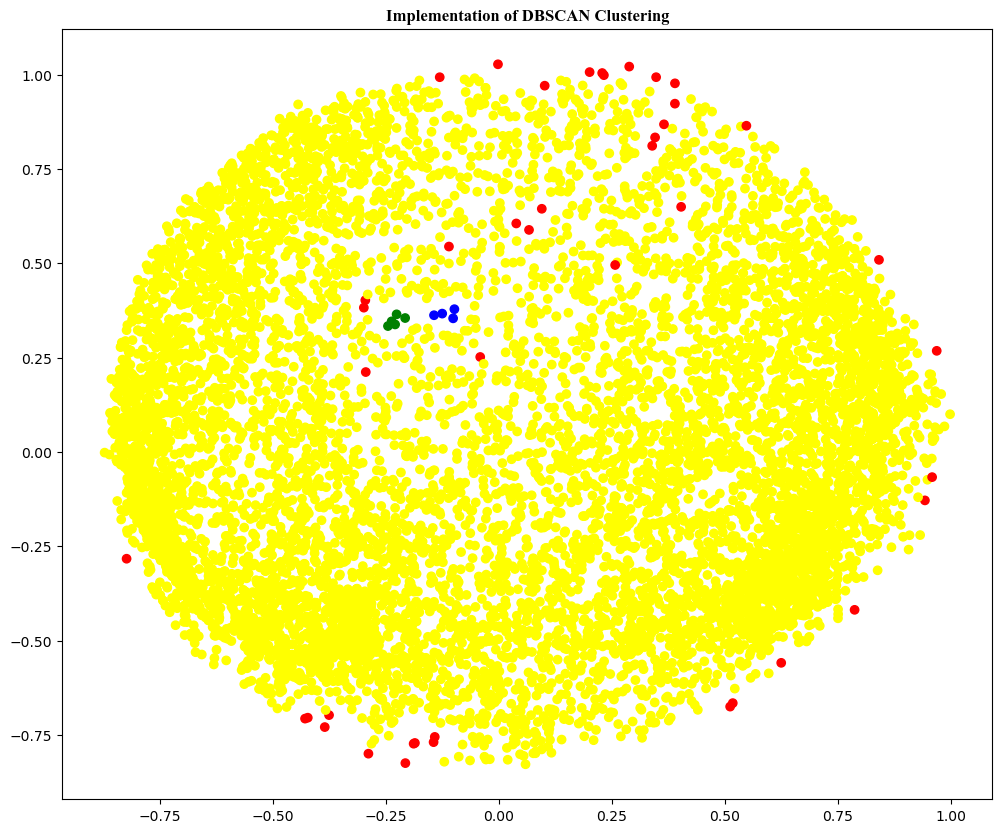

In [11]:
clusterColor = {0: u'yellow', 1: u'green', 2: 'blue', -1: u'red'}
colors = [clusterColor[label] for label in labels]
plt.figure(figsize=(12, 10))
plt.scatter(x_principal['V1'], x_principal['V2'], c=colors)
plt.title("Implementation of DBSCAN Clustering", fontname="Times New Roman",fontweight="bold")
plt.show()